# Simple Linear Reg.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("height-weight.csv")
df.head(3)

,Weight,Height
0,45,120
1,58,135
2,48,123


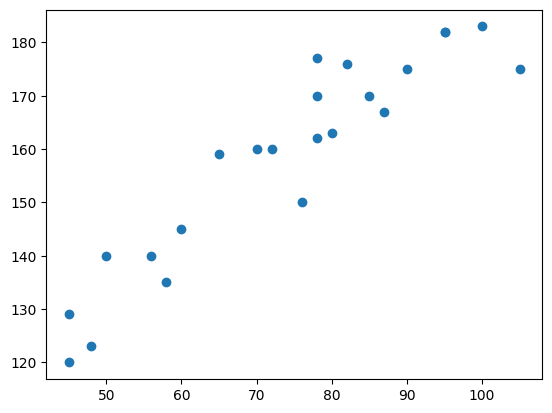

In [3]:
plt.scatter(data=df,x="Weight",y="Height")

# **STEPS :**

### 1. Diving to Independent and Dependent Features

In [4]:
X=df[["Weight"]]
y=df["Height"]

### 2. Train-Test Split

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,
                                               test_size=0.20,
                                               random_state=42)

### 3. Standardization

In [6]:
# Train Independent Feature would be standarized

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [7]:
X_train.head()

,Weight
12,105
1,58
13,100
5,78
2,48


In [8]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

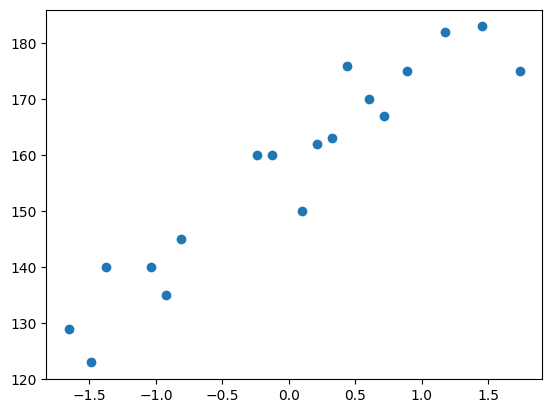

In [9]:
plt.scatter(X_train,y_train)

### 4. Train The Model

In [10]:
from sklearn.linear_model import LinearRegression

regression=LinearRegression()

In [11]:
regression.fit(X_train,y_train)

LinearRegression()

In [12]:
regression.coef_ ## Slope of Weight

array([17.03440872])

In [13]:
regression.intercept_

np.float64(157.5)

In [14]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [15]:
regression.predict(X_train)

array([187.0869102 , 141.82375282, 182.27168069, 161.08467086,
       132.19329381, 177.45645118, 129.3041561 , 143.74984463,
       153.38030364, 159.15857905, 134.11938561, 139.89766102,
       155.30639545, 172.64122168, 164.93685446, 167.82599217,
       169.75208397, 163.01076266])

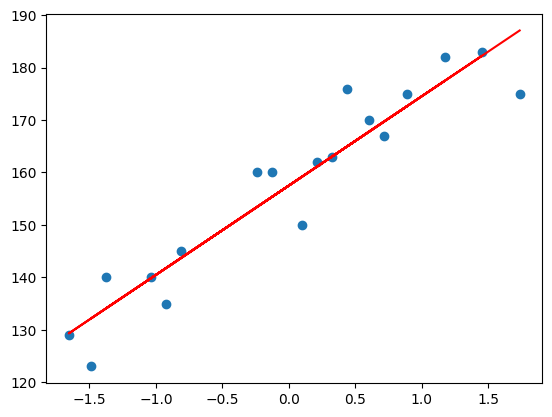

In [16]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train),color="r")

### 5. Predict

### prediction of test data
predicted height output= intercept +coef_(Weights)

y_pred_test =156.470 + 17.29(X_test)

In [17]:
## Prediction for test data
y_pred=regression.predict(X_test)

In [18]:
y_pred,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

In [19]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

In [20]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

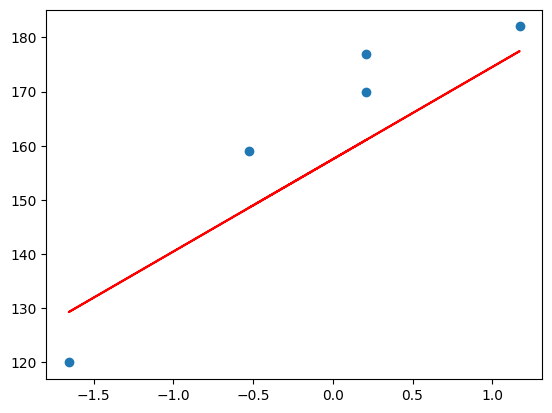

In [21]:
plt.scatter(X_test,y_test)
plt.plot(X_test,regression.predict(X_test),color="r")

### 6. Performance Metrics

In [22]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(mse)
print(mae)
print(rmse)

109.77592599051664
9.822657814519232
10.477400726827081


In [23]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
score

0.776986986042344

**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

R2: The R2 of the model n: The number of observations k: The number of predictor variables

In [24]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252

Let's say new data point weight is 80, now i want to predict the height

In [25]:
scaled_weight=scaler.transform([[80]])
scaled_weight

C:\Users\SPPL IT\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [26]:
regression.predict(scaled_weight) ## New Height !

array([163.01076266])

## Assumptions

plot a scatter plot for the predictions

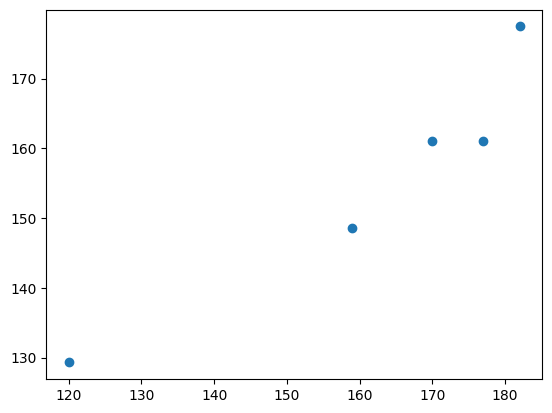

In [27]:
plt.scatter(y_test,y_pred)

If Linearly Distributed , good prediction

### Residuals

residuals= y_test-y_pred

In [28]:
residuals= y_test-y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

Plot the residuals

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_9864\2322259484.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Height', ylabel='Density'>

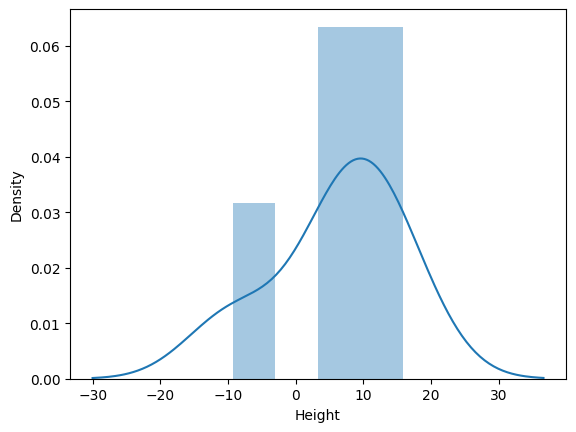

In [41]:
sns.distplot(residuals,kde=True)


Kind of normal distribution, so good model

# **Multiple Linear Regression**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
from sklearn.datasets import fetch_california_housing

In [45]:
california=fetch_california_housing()

In [48]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [50]:
print(california.DESCR) #Independent Features

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [51]:
california.target_names ## Output Feature

['MedHouseVal']

In [52]:
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [ ]:
## Prepare the Dataframe

In [53]:
dataset=pd.DataFrame(california.data,columns=california.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [54]:
dataset["Price"]=california.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [55]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Axes: >

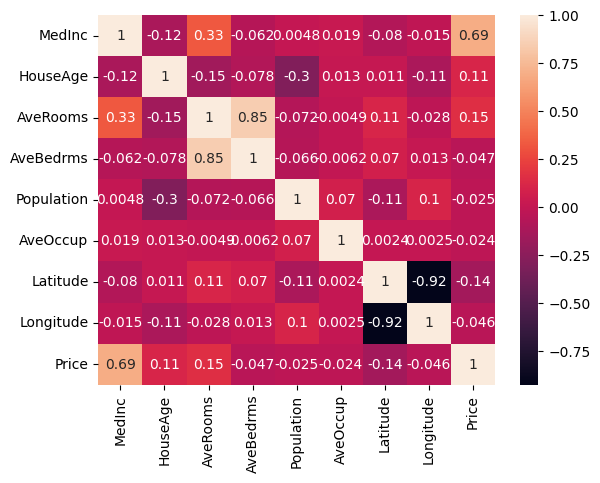

In [57]:
sns.heatmap(dataset.corr(),annot=True)

In [61]:
## Independent and dependent features

X= dataset.drop("Price",axis=1)
y=dataset["Price"]

In [64]:
## Train-Test Split

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=0.33,random_state=10
)

In [67]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((13828, 8), (13828,), (6812, 8), (6812,))

In [68]:
## Standardization

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [69]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [70]:
X_train

array([[-0.72986836,  1.22081889, -0.70305988, ...,  0.05861244,
         0.96929441, -1.43979718],
       [-0.61046678, -0.28439808,  0.07828001, ...,  0.13015917,
        -0.75823526,  1.08204942],
       [ 0.00784578, -0.60128586, -0.2447376 , ..., -0.09793279,
         0.94594941, -1.2454256 ],
       ...,
       [ 0.88684913, -1.78961504, -0.21300658, ...,  0.09549475,
         0.78720344, -1.10587678],
       [-0.87672223,  0.50782138, -1.10043274, ...,  0.18513096,
        -0.77224225,  0.66838683],
       [-0.62742573, -0.99739558, -0.60483749, ..., -0.08418874,
         0.77786545, -1.15073176]])

In [71]:
X_test

array([[ 0.75154854, -1.31428337, -0.39376169, ...,  0.12606697,
        -0.68820027,  0.19491761],
       [ 0.05935857, -0.12595418, -0.33070668, ..., -0.12021013,
         0.89459042, -1.36503888],
       [ 0.34405687, -1.31428337, -0.41007104, ..., -0.15581759,
        -0.91698123,  0.89764561],
       ...,
       [ 0.36483158,  0.27015554,  0.04216837, ..., -0.08014641,
        -0.46875731, -0.43803598],
       [-0.90412152, -0.91817364,  0.66736933, ..., -0.10263685,
         2.51006411, -1.96808915],
       [-0.43377577,  1.22081889, -0.44835491, ...,  0.2807072 ,
        -0.74422826,  0.69330627]])

# Model Training

In [72]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [73]:
regression.fit(X_train,y_train)

LinearRegression()

In [74]:
regression.coef_

array([ 0.82872299,  0.1231163 , -0.27068752,  0.32859106,  0.00213572,
       -0.02810091, -0.93017985, -0.89505497])

In [75]:
regression.intercept_

np.float64(2.0634768086491184)

In [76]:
## Prediction

y_pred=regression.predict(X_test)
y_pred

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

In [78]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
score=r2_score(y_test,y_pred)

mse,mae,rmse,score

(np.float64(0.552233239936362),
 np.float64(0.5371056943007961),
 np.float64(0.743123973463622),
 0.5935958526436639)

In [79]:
#display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.5931179409607519

## Assumptions

Text(0, 0.5, 'Test Predicted Data')

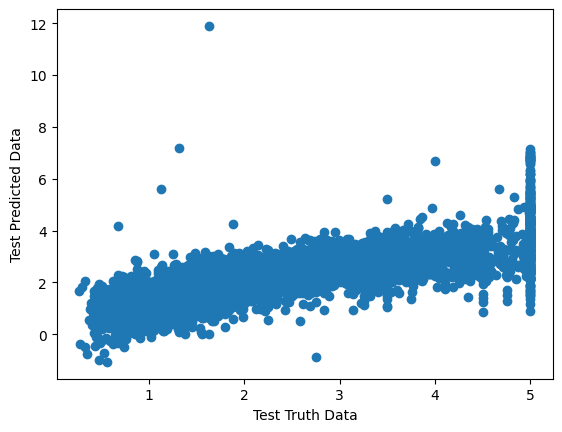

In [84]:
plt.scatter(y_test,y_pred)
plt.xlabel("Test Truth Data")
plt.ylabel("Test Predicted Data")

C:\Users\SPPL IT\AppData\Local\Temp\ipykernel_9864\4244255802.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals,kde=True)


<Axes: xlabel='Price', ylabel='Density'>

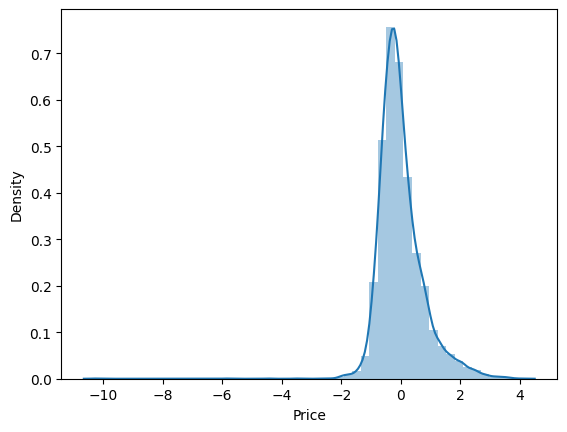

In [85]:
## Residuals
residuals=y_test-y_pred
sns.distplot(residuals,kde=True)

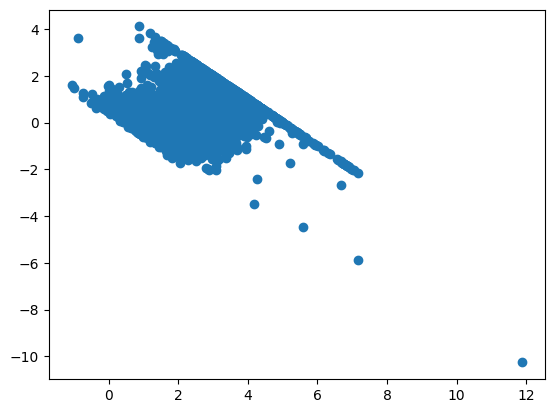

In [86]:
## ScatterPlot with prediction and residual --> Should be Uniform

plt.scatter(y_pred,residuals)

Not Uniform, Uniform means no pattern basically

## **Pickling**

Python pickle module is used for serialising and de-serialising a Python object structure. Any object in Python can be pickled so that it can be saved on disk. What pickle does is that it “serialises” the object first before writing it to file. Pickling is a way to convert a python object (list, dict, etc.) into a character stream. The idea is that this character stream contains all the information necessary to reconstruct the object in another python script.

In [87]:
import pickle
pickle.dump(regression,open('regressor.pkl','wb'))

This code saves a trained regression model to a file using the pickle module. Here's what happens:

- **`pickle.dump`**: This function converts the `regression` object (the trained model) into a byte stream.
- **`open('regressor.pkl', 'wb')`**: Opens a file named `regressor.pkl` in "write binary" mode (`'wb'`) to store the byte stream.
- **Result**: The `regression` model is saved as `regressor.pkl` so that you can load and use it later without retraining.

In simple terms: It saves your trained model into a file to reuse it later.


In [88]:
model=pickle.load(open('regressor.pkl','rb'))

This code loads a saved regression model from a file using the pickle module. Here's what happens:

- **`pickle.load`**: This function reads the byte stream from the file and reconstructs the original `regression` object (the trained model).
- **`open('regressor.pkl', 'rb')`**: Opens the file `regressor.pkl` in "read binary" mode (`'rb'`), allowing the model to be read from the file.
- **Result**: The saved `regression` model is loaded and assigned to the variable `model`, so you can use it again without retraining.

In simple terms: It loads the saved model from the file to reuse it.


In [89]:
model.predict(X_test)

array([3.00397485, 2.58011486, 2.3489077 , ..., 3.09003708, 0.79152007,
       2.04477012])

We save the trained model using pickle.dump to avoid retraining it every time, and later load it with pickle.load to reuse the model for predictions or further analysis.